### Project Name: House Prices: Advanced Regression Techniques
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Approach
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Hyperparameter Tuning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
# pd.pandas.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv('./Dataset_HousePricePrediction/train.csv')
test_data = pd.read_csv('./Dataset_HousePricePrediction/test.csv')

## 2. Feature Engineering
### We will be performing all the below steps in Feature Engineering

1. handling Missing values
2. Handling Temporal variables
3. Standarise the values of the variables to the same range

In [3]:
dataset = train_data.copy()

In [4]:
dataset.shape

(1460, 81)

### Missing Values
#### Categorical Missing Values

In [5]:
# make the list of features which has missing values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

# create a DataFrame to store feature names and their missing values percentages
missing_values_df = pd.DataFrame({
    'Feature': features_with_na,
    '% Missing': [np.round(dataset[feature].isnull().mean() * 100, 4) for feature in features_with_na]
})

# Sort the DataFrame by the percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='% Missing', ascending=False).reset_index(drop=True)

print(missing_values_df.to_string(index=False))

     Feature  % Missing
      PoolQC    99.5205
 MiscFeature    96.3014
       Alley    93.7671
       Fence    80.7534
 FireplaceQu    47.2603
  GarageType     5.5479
GarageFinish     5.5479
  GarageQual     5.5479
  GarageCond     5.5479
BsmtExposure     2.6027
BsmtFinType2     2.6027
    BsmtQual     2.5342
    BsmtCond     2.5342
BsmtFinType1     2.5342
  MasVnrType     0.5479


In [6]:
# missing value count > 80%

dataset.drop(['PoolQC'],axis=1,inplace=True)
dataset.drop(['Alley'],axis=1,inplace=True)
dataset.drop(['MiscFeature'],axis=1,inplace=True)
dataset.drop(['Fence'],axis=1,inplace=True)

In [7]:
# value count > 99%

dataset.drop(['Street'], axis=1, inplace=True)
dataset.drop(['Utilities'], axis=1, inplace=True)

_<b>Replace missing value with a new value_

In [8]:
dataset['FireplaceQu']=dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['FireplaceQu']=dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType']=dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['GarageFinish']=dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual']=dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageCond']=dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset['BsmtExposure']=dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1']=dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinType2']=dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['BsmtCond']=dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtQual']=dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['MasVnrType']=dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])

In [9]:
dataset.shape

(1460, 75)

### Numerical Missing Values

In [10]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


_<b>Initially replacing the NaN with 0 for type casting._

In [11]:
dataset['GarageYrBlt'].fillna(value=0, inplace=True)
dataset['GarageYrBlt'].isnull().sum()

0

In [12]:
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype('int32')
dataset['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: int32

In [13]:
# Total houses whose Year build is not the same as Garage built year
len(dataset.loc[dataset['GarageYrBlt']!=dataset['YearBuilt'],'GarageYrBlt'])

371

_<b> We can see that out of 1460 houses only 190 houses (371-181) have different garage built year. We can simply impute the 'YearBuilt' value in the Garagebuilt for the NaN's_

In [14]:
dataset.loc[dataset['GarageYrBlt']==0,'GarageYrBlt'] = dataset[dataset['GarageYrBlt']==0]['YearBuilt']
dataset[dataset['GarageYrBlt']==0]['GarageYrBlt']

Series([], Name: GarageYrBlt, dtype: int64)

_<b>All the GarageYrBuilt NaN values have been imputed with its YearBuilt values_

In [15]:
dataset['GarageAge'] = dataset['YrSold'] - dataset['GarageYrBlt']
dataset['GarageYrBlt'].isnull().sum()

0

In [16]:
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())

### Temporal Variables (Date Time Variables)
_<b>Changing them to count of years_

In [17]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=abs(dataset['YrSold']-dataset[feature])

In [18]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5
1,31,31,31
2,7,6,7
3,91,36,8
4,8,8,8


### Derived Features

In [19]:
dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
dataset['RemodelAge'] = abs(dataset['YrSold'] - dataset['YearRemodAdd'])
dataset['IsRemodeled'] = (dataset['YearBuilt'] != dataset['YearRemodAdd']).astype(int)
dataset['TotalBathrooms'] = dataset['FullBath'] + (0.5 * dataset['HalfBath']) + dataset['BsmtFullBath'] + (0.5 * dataset['BsmtHalfBath'])
dataset['TotalRooms'] = dataset['TotRmsAbvGrd'] + dataset['TotalBsmtSF']
dataset['TotalSF'] = dataset['GrLivArea'] + dataset['TotalBsmtSF']
dataset['LotFrontageToLotArea'] = dataset['LotFrontage'] / dataset['LotArea']
dataset['GarageAreaCars'] = dataset['GarageArea'] * dataset['GarageCars']
dataset['TotalPorchSF'] = dataset['WoodDeckSF'] + dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
dataset['OverallQualCond'] = dataset['OverallQual'] * dataset['OverallCond']

# neighborhood_price_map = dataset.groupby('Neighborhood')['SalePrice'].mean().to_dict()
# dataset['NeighborhoodPrice'] = dataset['Neighborhood'].map(neighborhood_price_map)

# Additional derived features
dataset['LivAreaToLotArea'] = dataset['GrLivArea'] / dataset['LotArea']
dataset['BsmtQualCond'] = dataset['BsmtQual'].astype(str) + "_" + dataset['BsmtCond'].astype(str)
dataset['TotalFloorsSF'] = dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset['HasPool'] = (dataset['PoolArea'] > 0).astype(int)
dataset['HasGarage'] = (dataset['GarageArea'] > 0).astype(int)
dataset['HasBasement'] = (dataset['TotalBsmtSF'] > 0).astype(int)
dataset['HasFireplace'] = (dataset['Fireplaces'] > 0).astype(int)
dataset['HasWoodDeck'] = (dataset['WoodDeckSF'] > 0).astype(int)
dataset['HasOpenPorch'] = (dataset['OpenPorchSF'] > 0).astype(int)
dataset['HasEnclosedPorch'] = (dataset['EnclosedPorch'] > 0).astype(int)
dataset['Has3SsnPorch'] = (dataset['3SsnPorch'] > 0).astype(int)
dataset['HasScreenPorch'] = (dataset['ScreenPorch'] > 0).astype(int)
dataset['QualToAgeRatio'] = dataset['OverallQual'] / (dataset['HouseAge'] + 1)

## 3. Feature Selection

In [20]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_features+['Id']]
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+year_features]
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [21]:
categorical_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'BsmtQualCond']

In [22]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'GarageAge',
 'HouseAge',
 'RemodelAge',
 'IsRemodeled',
 'TotalBathrooms',
 'TotalRooms',
 'TotalSF',
 'LotFrontageToLotArea',
 'GarageAreaCars',
 'TotalPorchSF',
 'OverallQualCond',
 'LivAreaToLotArea',
 'TotalFloorsSF',
 'HasPool',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'HasWoodDeck',
 'HasOpenPorch',
 'HasEnclosedPorch',
 'Has3SsnPorch',
 'HasScreenPorch',
 'QualToAgeRatio']

In [23]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
continuous_features

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'GarageAge',
 'HouseAge',
 'RemodelAge',
 'TotalRooms',
 'TotalSF',
 'LotFrontageToLotArea',
 'GarageAreaCars',
 'TotalPorchSF',
 'OverallQualCond',
 'LivAreaToLotArea',
 'TotalFloorsSF',
 'QualToAgeRatio']

In [25]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'IsRemodeled',
 'TotalBathrooms',
 'HasPool',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'HasWoodDeck',
 'HasOpenPorch',
 'HasEnclosedPorch',
 'Has3SsnPorch',
 'HasScreenPorch']

In [26]:
uniqueValCount = dataset[numerical_features].nunique()
uniqueValCount[uniqueValCount<50].sort_values(ascending=False)

OverallQualCond     32
LowQualFinSF        24
MiscVal             21
3SsnPorch           20
MSSubClass          15
TotRmsAbvGrd        12
MoSold              12
TotalBathrooms      10
OverallQual         10
OverallCond          9
BedroomAbvGr         8
PoolArea             8
YrSold               5
GarageCars           5
KitchenAbvGr         4
Fireplaces           4
BsmtFullBath         4
FullBath             4
BsmtHalfBath         3
HalfBath             3
IsRemodeled          2
HasPool              2
HasGarage            2
HasBasement          2
HasFireplace         2
HasWoodDeck          2
HasOpenPorch         2
HasEnclosedPorch     2
Has3SsnPorch         2
HasScreenPorch       2
dtype: int64

In [27]:
uniqueValCount[uniqueValCount<50].sort_values(ascending=False).index

Index(['OverallQualCond', 'LowQualFinSF', 'MiscVal', '3SsnPorch', 'MSSubClass',
       'TotRmsAbvGrd', 'MoSold', 'TotalBathrooms', 'OverallQual',
       'OverallCond', 'BedroomAbvGr', 'PoolArea', 'YrSold', 'GarageCars',
       'KitchenAbvGr', 'Fireplaces', 'BsmtFullBath', 'FullBath',
       'BsmtHalfBath', 'HalfBath', 'IsRemodeled', 'HasPool', 'HasGarage',
       'HasBasement', 'HasFireplace', 'HasWoodDeck', 'HasOpenPorch',
       'HasEnclosedPorch', 'Has3SsnPorch', 'HasScreenPorch'],
      dtype='object')

### Distribution of Numerical Columns that have Unique value count < 50
The idea is that these columns may not be purely numerical rather categorical

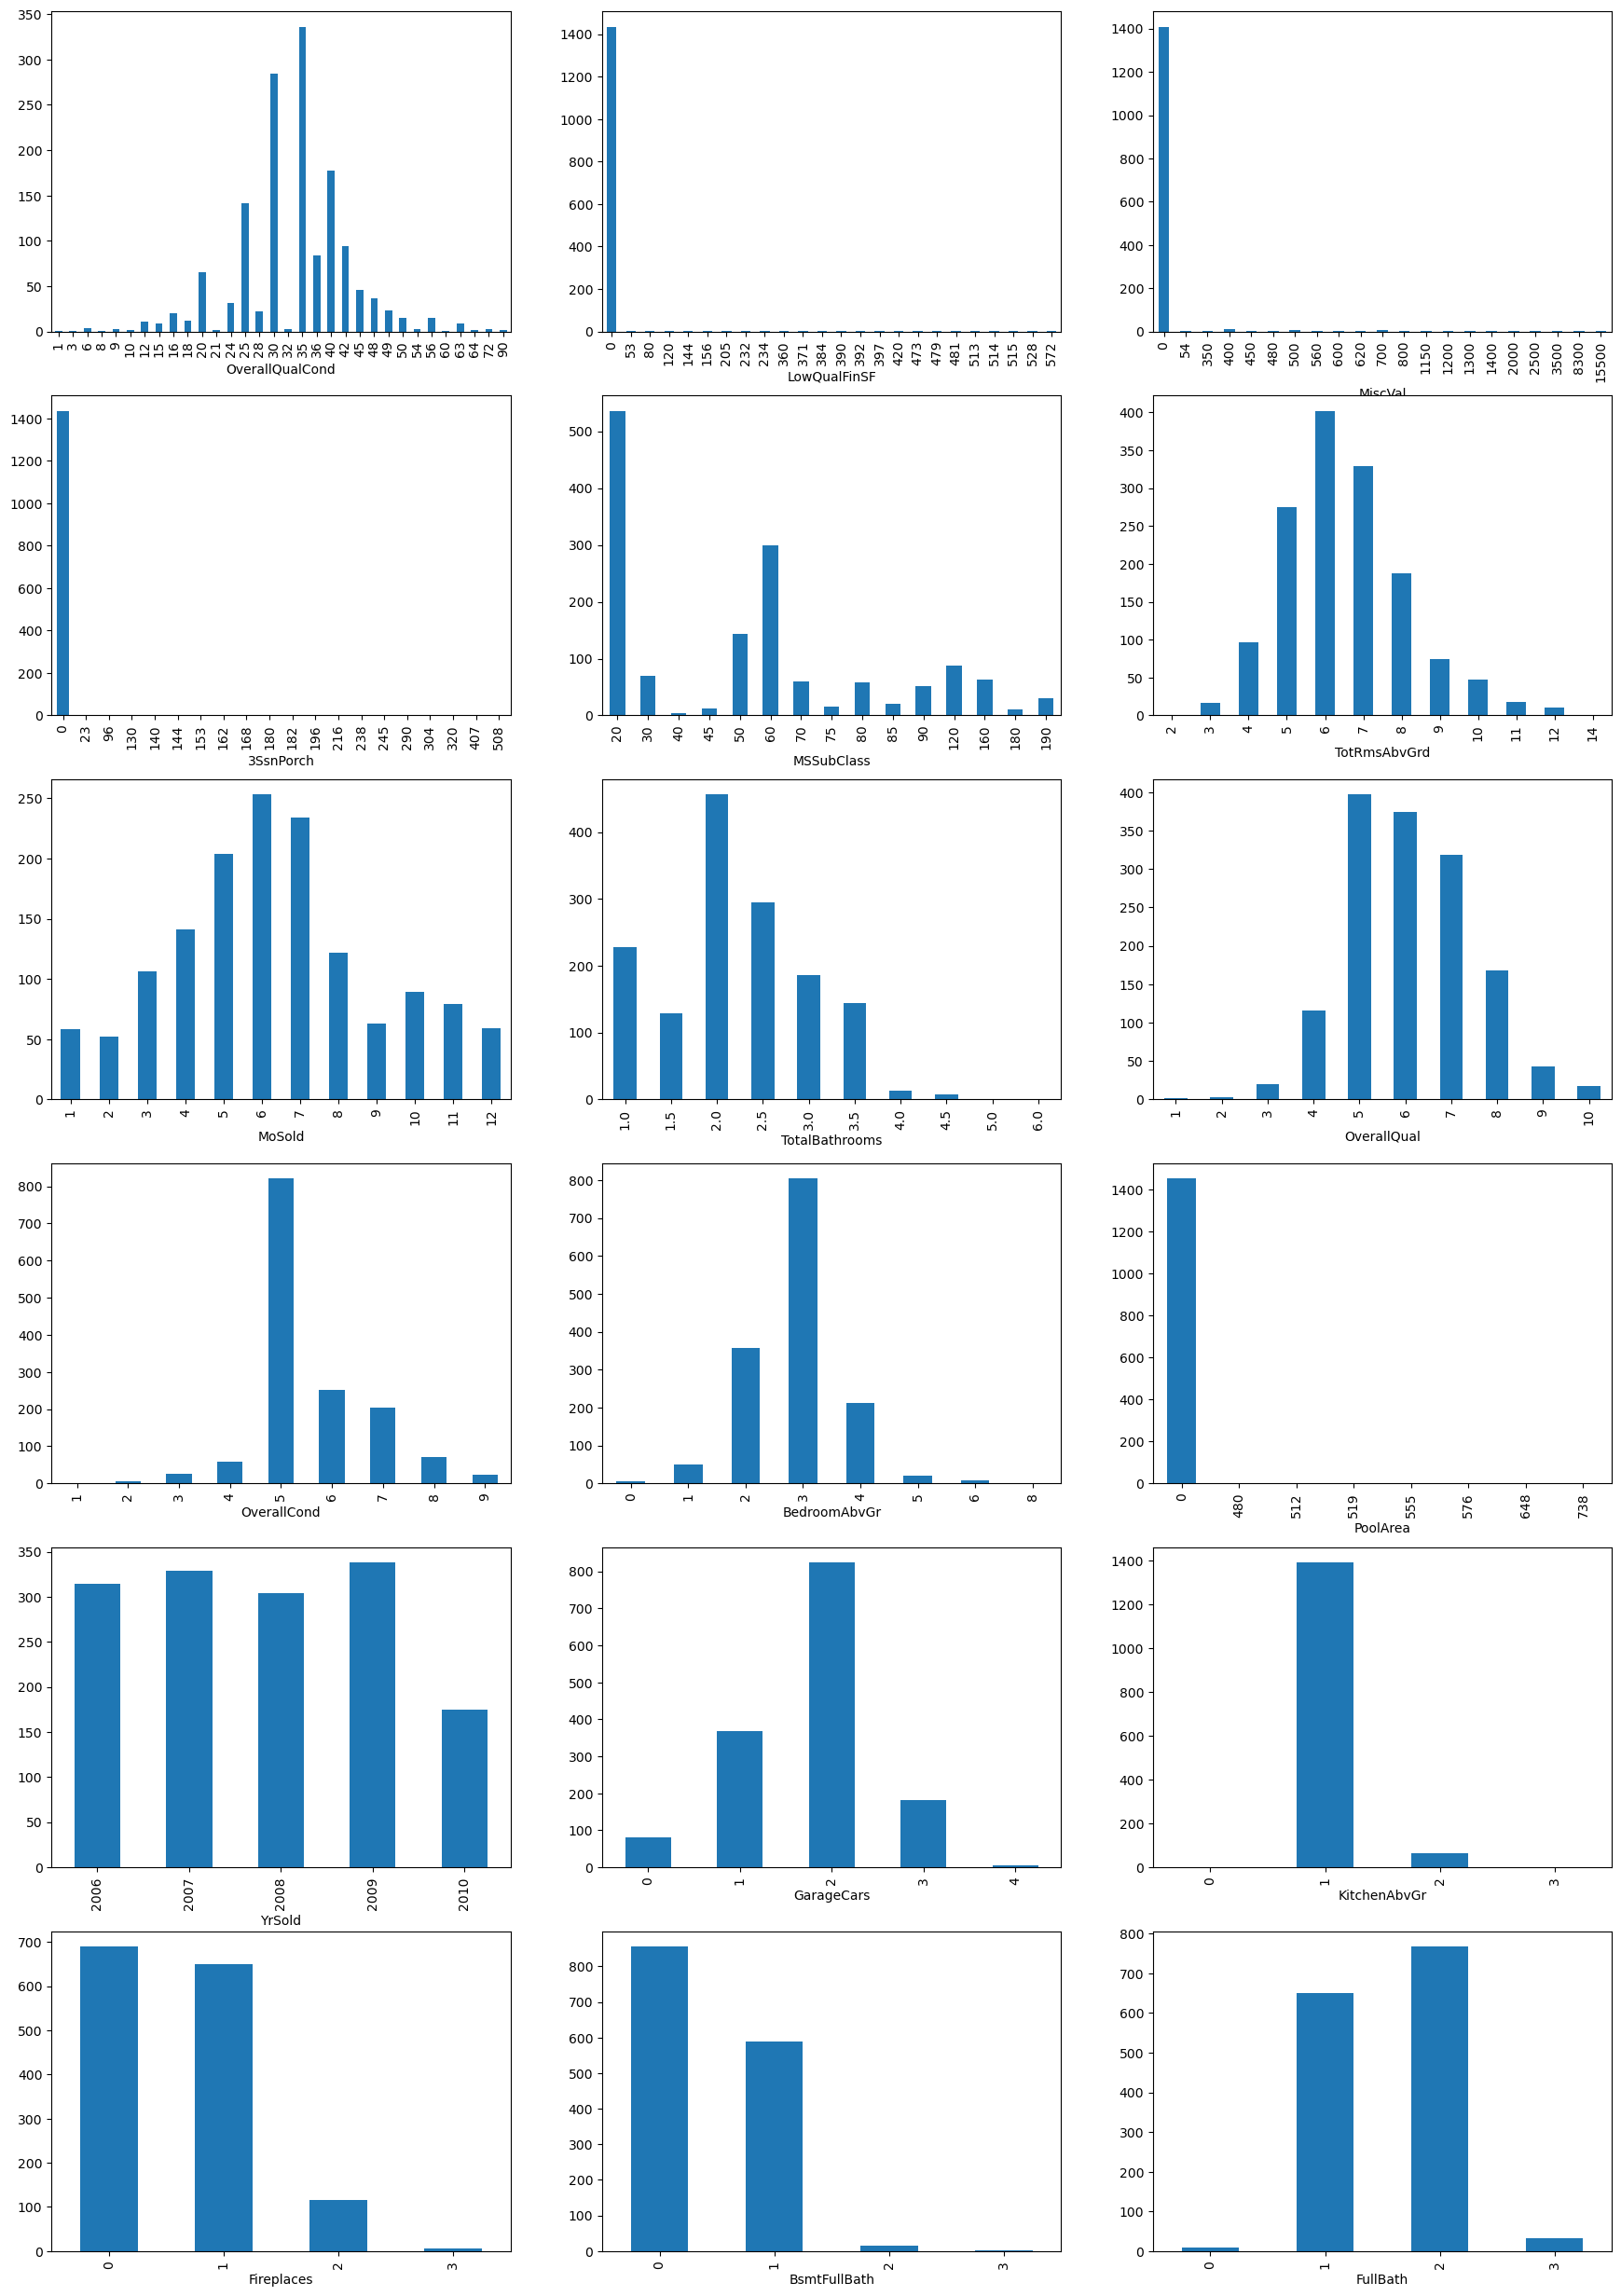

In [28]:
num_col =  uniqueValCount[uniqueValCount<50].sort_values(ascending=False).index
rows = 6
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        dataset.groupby(num_col[i]).size().plot(kind='bar',)
        i+=1

### Box Plot for the Columns that have Unique value count < 50

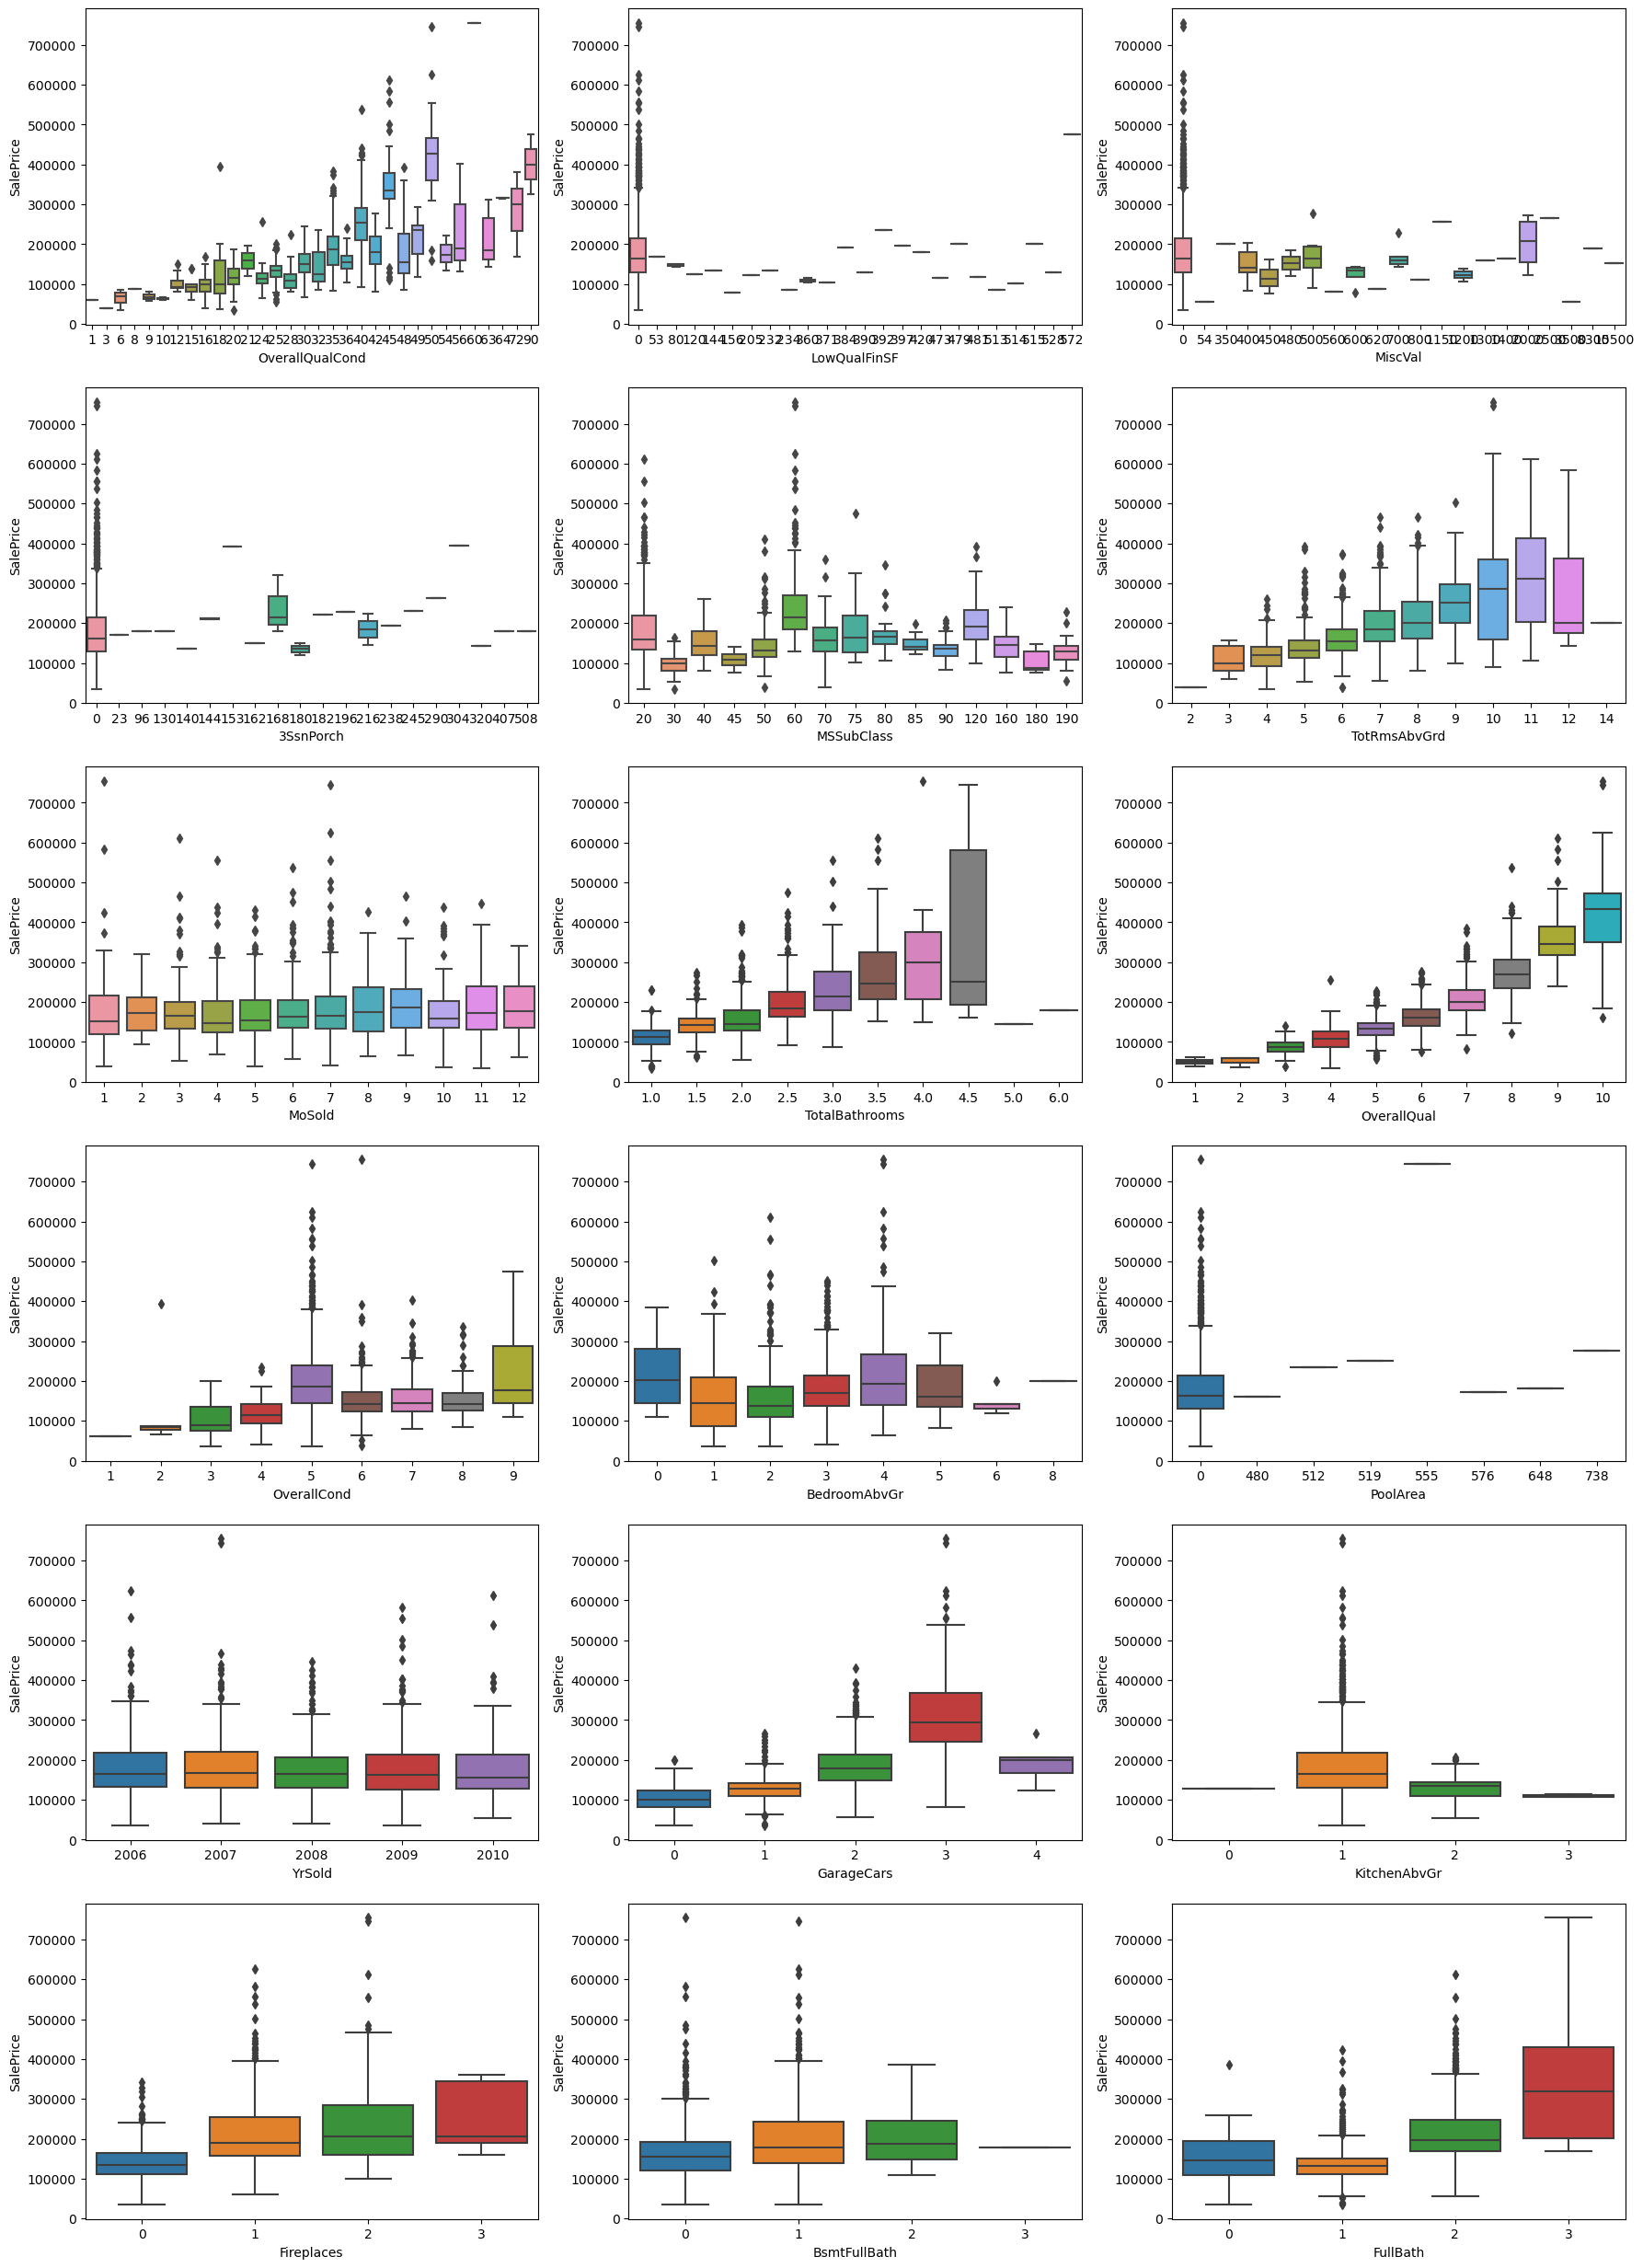

In [29]:
rows = 6
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        sns.boxplot(x =num_col[i] , y =dataset['SalePrice'], data =  dataset)
        #train_df.groupby(num_col[i]).size().plot(kind='bar',)
        i+=1

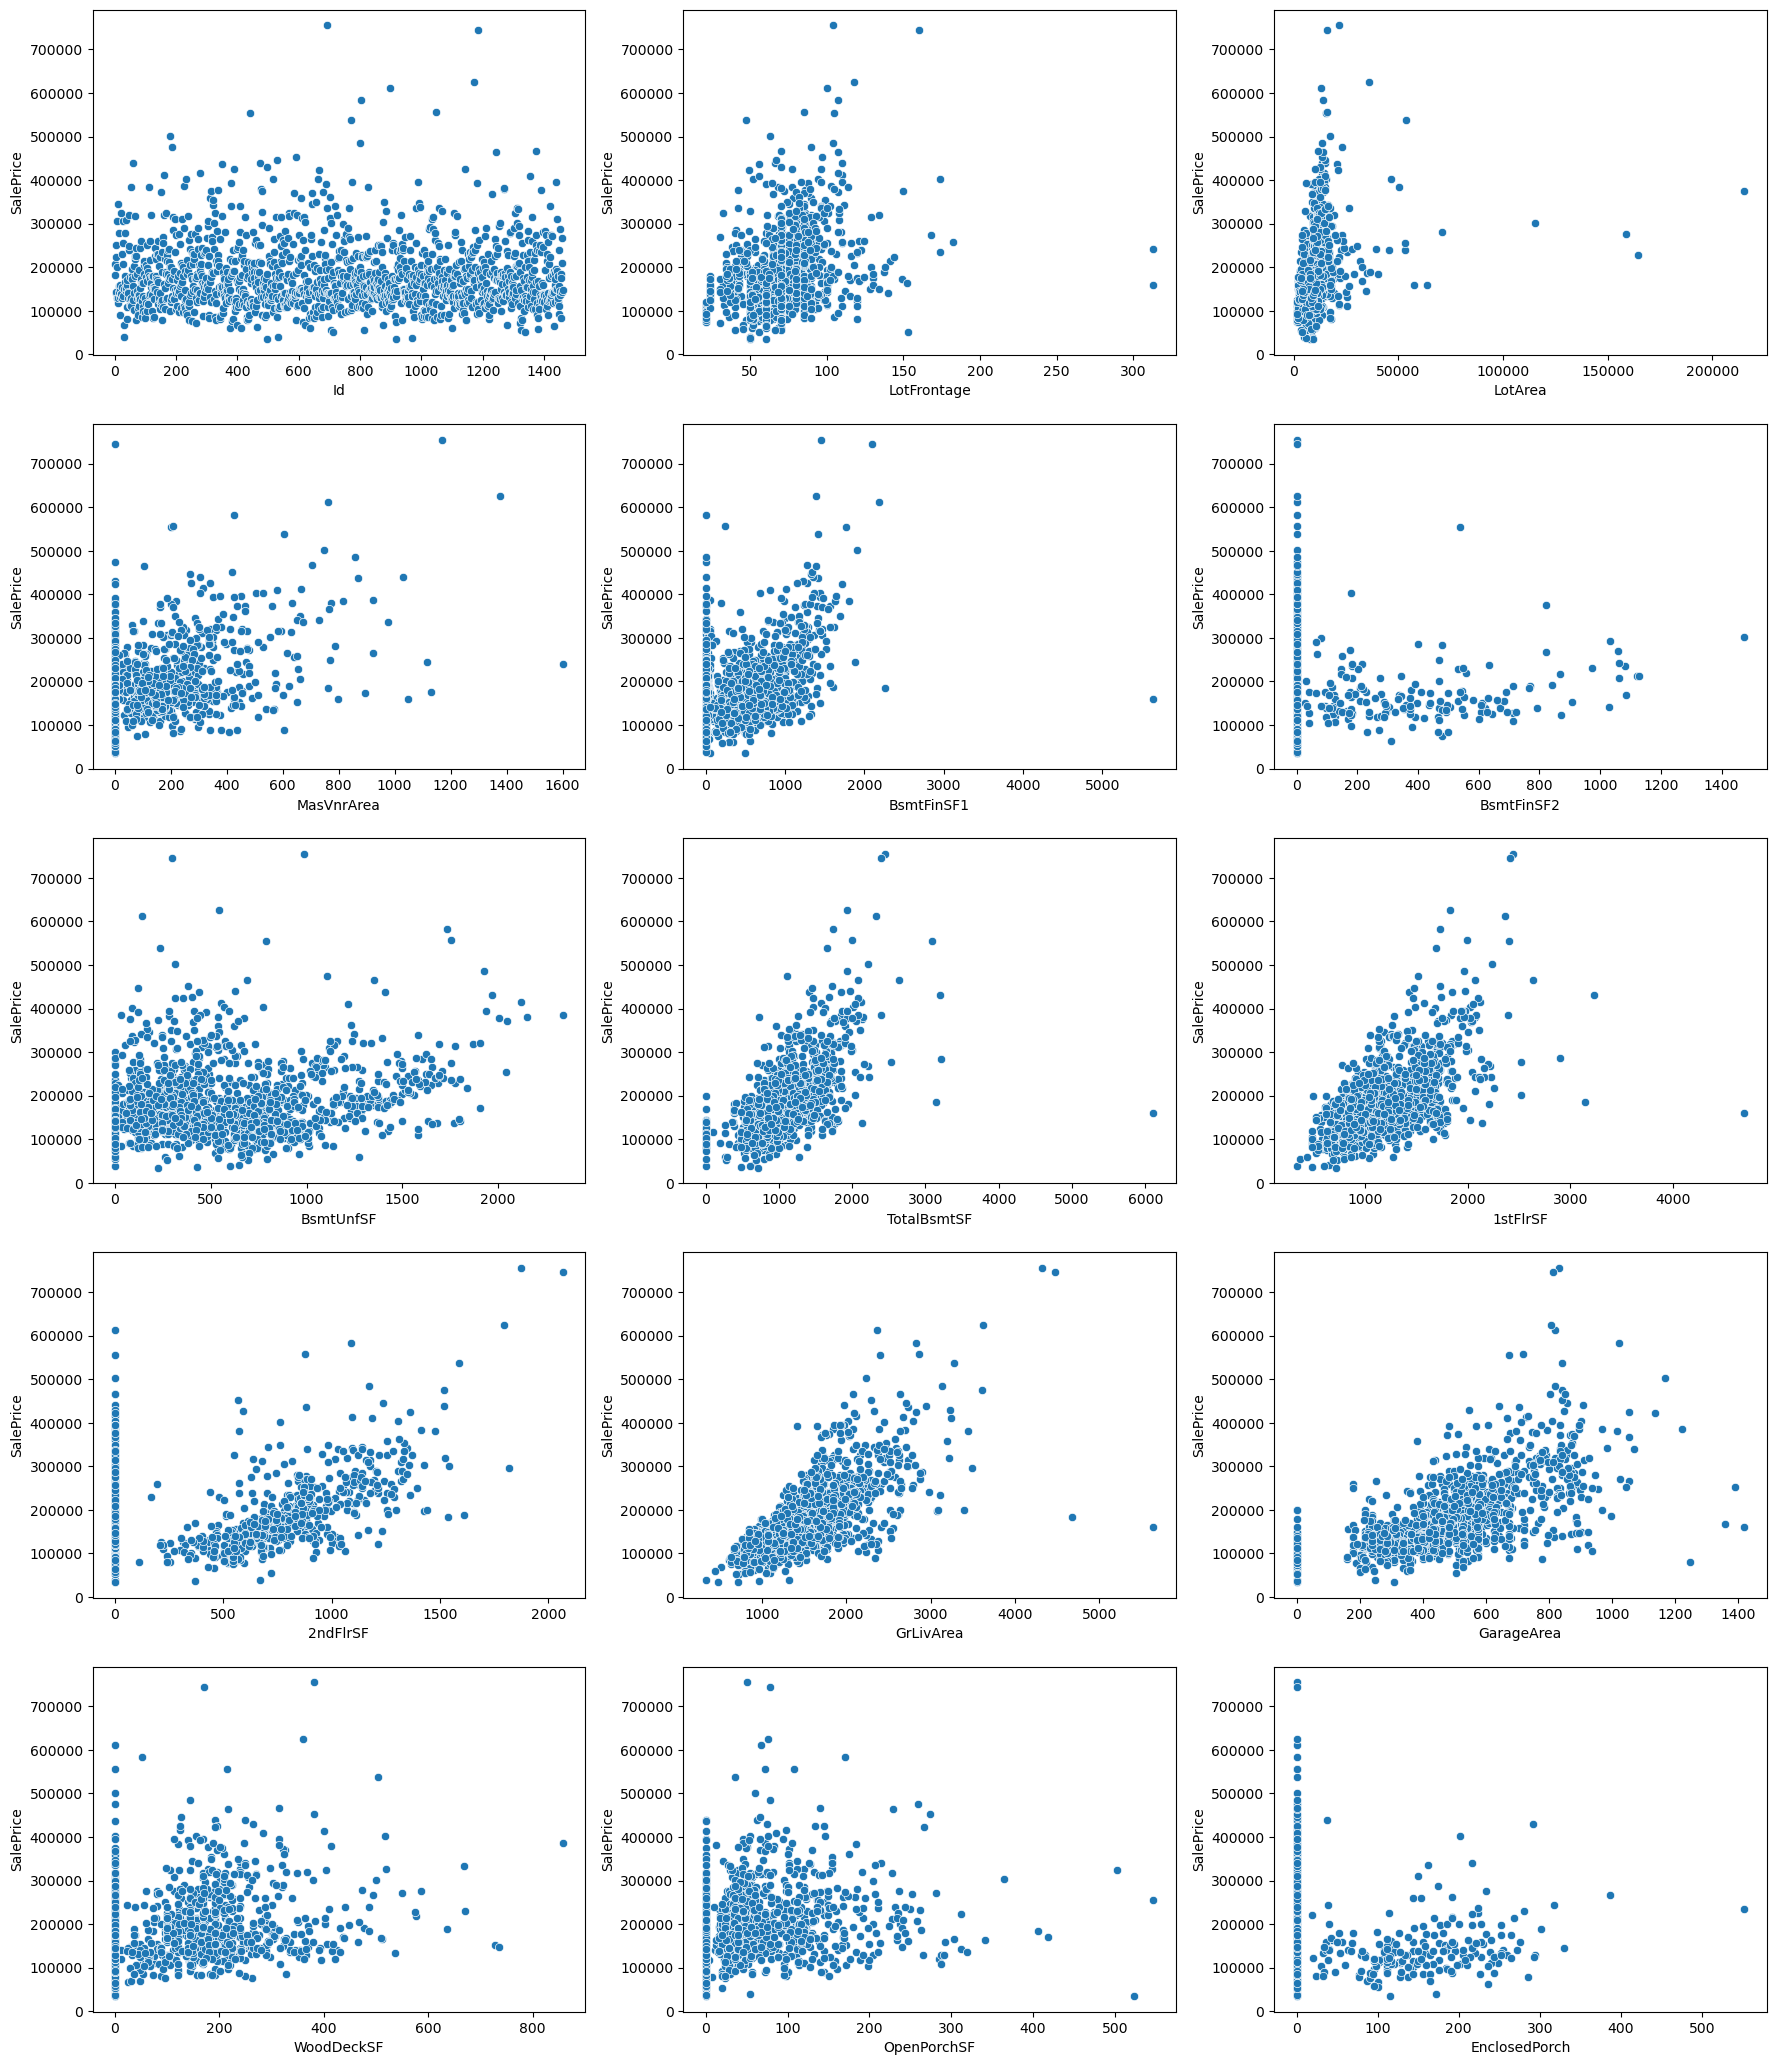

In [30]:
rows = 5
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        sns.scatterplot(x =continuous_features[i] , y =dataset['SalePrice'], data=dataset)
        #dataset.groupby(num_col[i]).size().plot(kind='bar',)
        i +=1

In [31]:
def calculateAnova(inpData,catCols, target):
    from scipy.stats import f_oneway
    CatColumnList = []
    for cat in catCols:
        CatGroupList = inpData.groupby(cat)[target].apply(list)
        anova = f_oneway(*CatGroupList)
        if(anova[1]<0.05):
            print('The column ', cat, ' is correlated with ', target, ' | P-Value: ',anova[1])
            CatColumnList.append(cat)
        else:
            print('The column ', cat , ' is NOT correlated with ', target, ' | P-Value: ',anova[1])
    
    return(CatColumnList)

In [32]:
# Filter our columns with pearson's coefficient > 0.4
corr_mat = dataset[continuous_features].corr()
selected_continuous_features = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])>0.4].index.tolist()
selected_continuous_features.append('Id')
selected_continuous_features

['MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice',
 'GarageAge',
 'HouseAge',
 'RemodelAge',
 'TotalRooms',
 'TotalSF',
 'GarageAreaCars',
 'OverallQualCond',
 'TotalFloorsSF',
 'QualToAgeRatio',
 'Id']

In [33]:
target = 'SalePrice'
selected_discrete_features = calculateAnova(dataset,discrete_features,target)
selected_discrete_features

The column  MSSubClass  is correlated with  SalePrice  | P-Value:  8.66216626609302e-79
The column  OverallQual  is correlated with  SalePrice  | P-Value:  0.0
The column  OverallCond  is correlated with  SalePrice  | P-Value:  7.962288819950615e-38
The column  LowQualFinSF  is NOT correlated with  SalePrice  | P-Value:  0.25565603616955446
The column  BsmtFullBath  is correlated with  SalePrice  | P-Value:  2.88243552729416e-17
The column  BsmtHalfBath  is NOT correlated with  SalePrice  | P-Value:  0.8013743052059724
The column  FullBath  is correlated with  SalePrice  | P-Value:  3.8021879324489406e-129
The column  HalfBath  is correlated with  SalePrice  | P-Value:  1.6091449454034875e-31
The column  BedroomAbvGr  is correlated with  SalePrice  | P-Value:  3.3043196450461637e-16
The column  KitchenAbvGr  is correlated with  SalePrice  | P-Value:  2.011735142857873e-06
The column  TotRmsAbvGrd  is correlated with  SalePrice  | P-Value:  1.1917103366526644e-103
The column  Fireplaces

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'TotalBathrooms',
 'HasPool',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'HasWoodDeck',
 'HasOpenPorch',
 'HasEnclosedPorch',
 'HasScreenPorch']

In [34]:
selected_year_features = calculateAnova(dataset,year_features,target)
selected_year_features

The column  YearBuilt  is correlated with  SalePrice  | P-Value:  7.029487852356836e-96
The column  YearRemodAdd  is correlated with  SalePrice  | P-Value:  5.9813482988115745e-77
The column  GarageYrBlt  is correlated with  SalePrice  | P-Value:  3.9966334650125254e-79
The column  YrSold  is NOT correlated with  SalePrice  | P-Value:  0.6300887663573457


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [35]:
selected_categorical_features = calculateAnova(dataset,categorical_features,target)
selected_categorical_features

The column  MSZoning  is correlated with  SalePrice  | P-Value:  8.817633866272648e-35
The column  LotShape  is correlated with  SalePrice  | P-Value:  6.447523852011766e-25
The column  LandContour  is correlated with  SalePrice  | P-Value:  2.7422167521379096e-08
The column  LotConfig  is correlated with  SalePrice  | P-Value:  3.163167473604189e-06
The column  LandSlope  is NOT correlated with  SalePrice  | P-Value:  0.1413963584114019
The column  Neighborhood  is correlated with  SalePrice  | P-Value:  1.5586002827707996e-225
The column  Condition1  is correlated with  SalePrice  | P-Value:  8.904549416138853e-08
The column  Condition2  is correlated with  SalePrice  | P-Value:  0.043425658360948464
The column  BldgType  is correlated with  SalePrice  | P-Value:  2.0567364604967015e-10
The column  HouseStyle  is correlated with  SalePrice  | P-Value:  3.376776535121222e-25
The column  RoofStyle  is correlated with  SalePrice  | P-Value:  3.653523047099125e-17
The column  RoofMatl  i

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'BsmtQualCond']

In [36]:
droppable_categorical_features = [item for item in categorical_features if item not in selected_categorical_features]
droppable_categorical_features

['LandSlope']

In [37]:
droppable_year_features = [item for item in year_features if item not in selected_year_features]
droppable_year_features

['YrSold']

In [38]:
droppable_discrete_features = [item for item in discrete_features if item not in selected_discrete_features]
droppable_discrete_features

['LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'IsRemodeled',
 'Has3SsnPorch']

In [39]:
droppable_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])<=0.4].index.tolist()
if 'Id' in droppable_continuous_columns:
    droppable_continuous_columns.remove('Id')
droppable_continuous_columns

['LotFrontage',
 'LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'LotFrontageToLotArea',
 'TotalPorchSF',
 'LivAreaToLotArea']

In [40]:
dataset.drop(columns = droppable_discrete_features, axis=1, inplace=True)
dataset.drop(columns = droppable_year_features, axis=1, inplace=True)
dataset.drop(columns=droppable_continuous_columns, axis =1, inplace=True)
dataset.drop(columns = droppable_categorical_features, axis=1, inplace=True)
print('The predictor size after dropping the columns', len(dataset.columns))

The predictor size after dropping the columns 77


In [41]:
selected_features=selected_categorical_features+selected_year_features+selected_continuous_features+selected_discrete_features
print('Final count of selected Features',len(selected_features))

Final count of selected Features 77


In [42]:
x = [item for item in dataset.columns if item not in selected_features]
x

[]

In [43]:
dataset.drop(columns = x, axis=1, inplace=True)

In [44]:
x = [item for item in dataset.columns if item not in selected_features]
x

[]

In [45]:
selected_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'BsmtQualCond',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice',
 'GarageAge',
 'HouseAge',
 'RemodelAge',
 'TotalRooms',
 'TotalSF',
 'GarageAreaCars',
 'OverallQualCond',
 'TotalFloorsSF',
 'QualToAgeRatio',
 'Id',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'Gar

C:\Users\heman\AppData\Local\Temp\ipykernel_7228\2538203699.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset[selected_features].corr(), cmap='coolwarm', annot=True, annot_kws={'size':10}, )


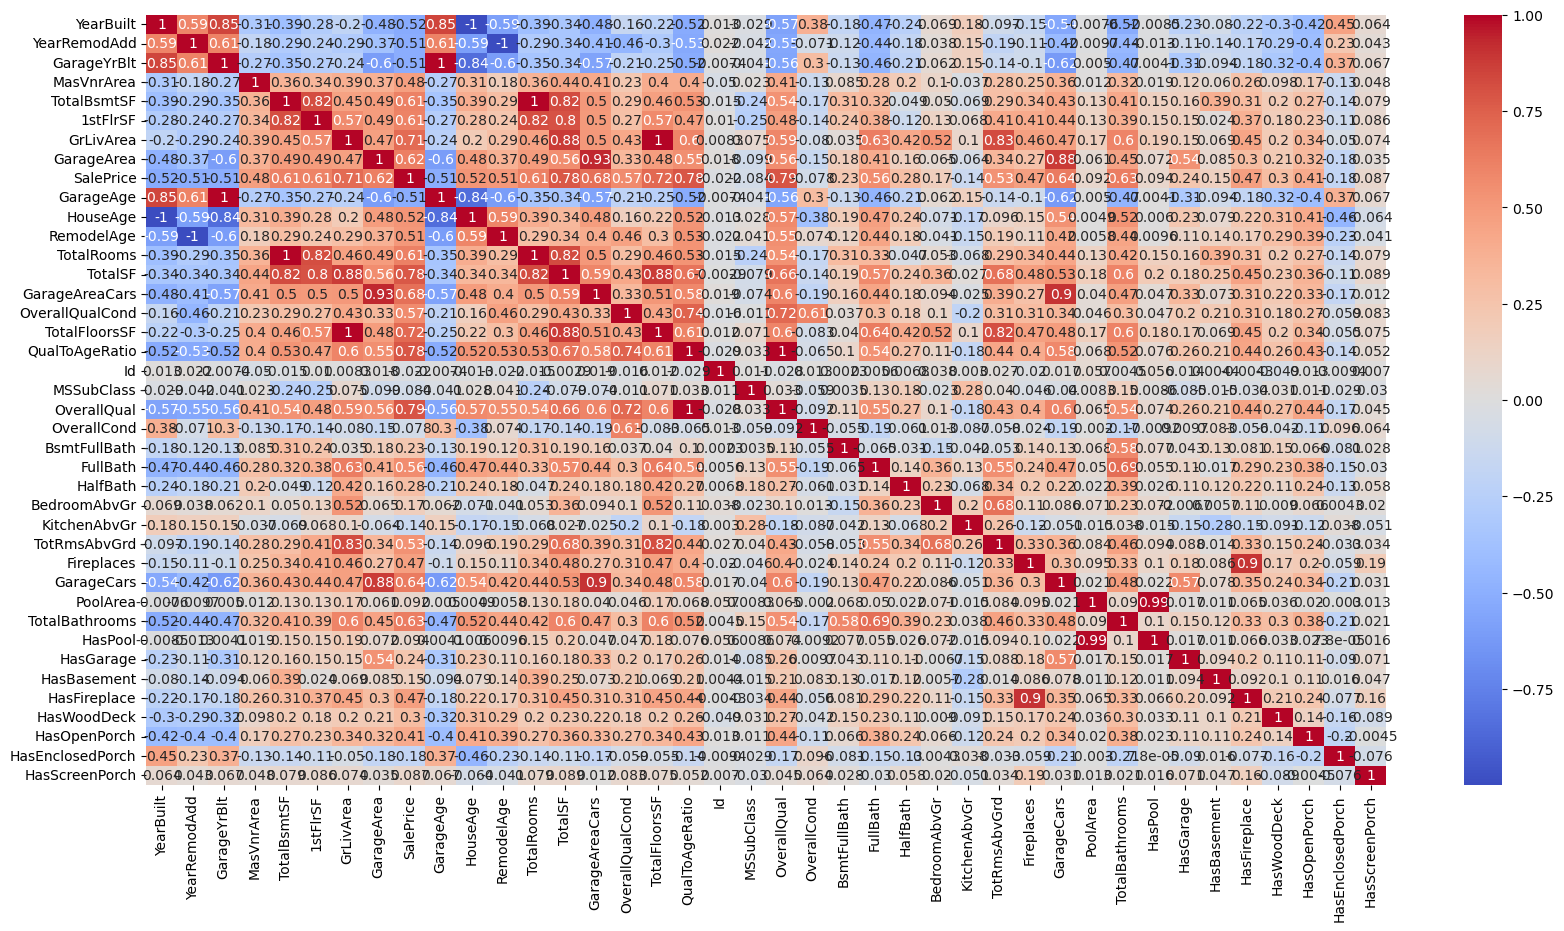

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dataset[selected_features].corr(), cmap='coolwarm', annot=True, annot_kws={'size':10}, )
plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_7228\1825003468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SalePrice'],hist_kws={"edgecolor": (1,0,0,0.4)})


<Axes: xlabel='SalePrice', ylabel='Density'>

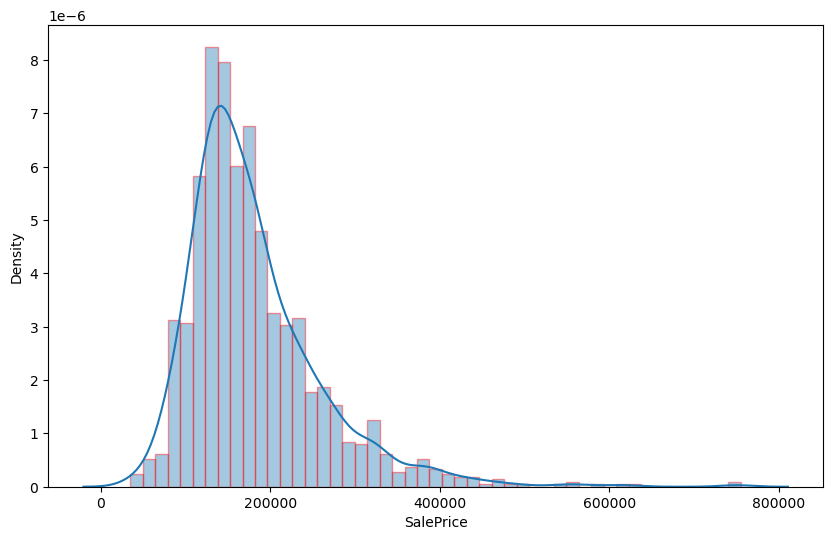

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['SalePrice'],hist_kws={"edgecolor": (1,0,0,0.4)})

In [48]:
dataset['SalePrice']=np.log(dataset['SalePrice'])

C:\Users\heman\AppData\Local\Temp\ipykernel_7228\1825003468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SalePrice'],hist_kws={"edgecolor": (1,0,0,0.4)})


<Axes: xlabel='SalePrice', ylabel='Density'>

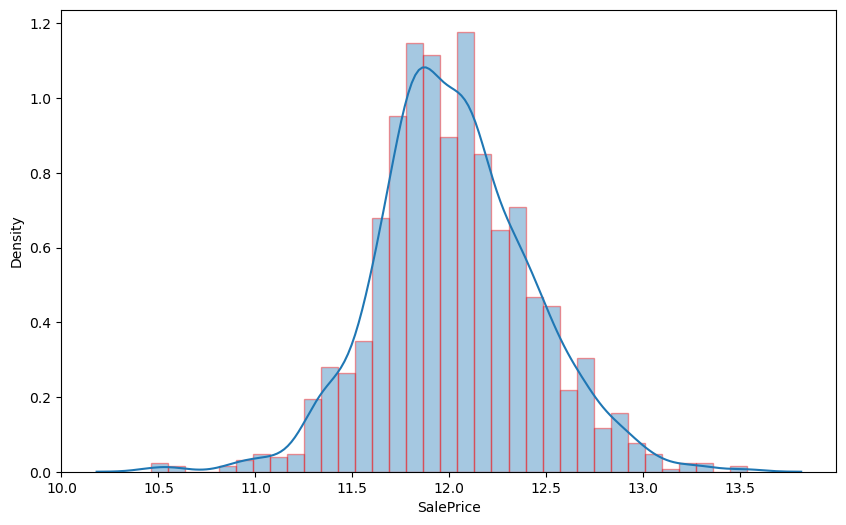

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['SalePrice'],hist_kws={"edgecolor": (1,0,0,0.4)})

In [50]:
train_df = dataset.copy()
house_price = train_df["SalePrice"]
train_df.drop(['SalePrice'],axis=1,inplace=True)
train_df_copy = train_df.copy()

In [51]:
train_df.shape

(1460, 76)

In [52]:
house_price.shape

(1460,)

In [53]:
train_df.to_csv("trainData_prepared.csv", index=False)
house_price.to_csv("testData_prepared.csv", index=False)